## Analysing textual features

In [1]:
import keras
import re
import numpy as np
import pandas as pd

import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline

Using TensorFlow backend.


In [2]:
from methods.baseline import Baseline
from methods.experiments import Experiment
from methods.evaluation import Evaluation
from methods.retrieval import Retrieval

In [3]:
MAX_SEQUENCE_LENGTH_T = 20 # 40
MAX_SEQUENCE_LENGTH_D = 200 # 200
EMBEDDING_DIM = 300
MAX_NB_WORDS = 2000

In [4]:
DOMAIN = 'netbeans'
DIR = 'data/processed/{}'.format(DOMAIN)
DIR_PAIRS = 'data/normalized/{}'.format(DOMAIN)
DATASET = os.path.join('data/normalized/{}'.format(DOMAIN), '{}.csv'.format(DOMAIN))

In [5]:
df_train_pair = pd.read_csv(os.path.join(DIR_PAIRS, '{}_pairs.csv'.format(DOMAIN)))
baseline = Baseline(DIR, DATASET, MAX_SEQUENCE_LENGTH_T, MAX_SEQUENCE_LENGTH_D)
evaluation = Evaluation(verbose=0)
retrieval = Retrieval()
experiment = Experiment(baseline, evaluation)

In [6]:
experiment.set_retrieval(retrieval, baseline, DOMAIN)

Creating the buckets...


In [7]:
experiment.load_ids()

Reading bug ids


In [8]:
len(baseline.bug_ids)

216715

In [9]:
experiment.load_bugs()

In [10]:
issues_by_buckets = experiment.get_buckets_for_bugs()

In [ ]:
%%time

baseline.prepare_dataset(issues_by_buckets)

Reading train data


In [ ]:
title_corpus = [baseline.bug_set[i]['title'] for i in tqdm(baseline.bug_ids)]
description_corpus = [baseline.bug_set[i]['description'] for i in tqdm(baseline.bug_ids)]

In [ ]:
title_length = [len(baseline.bug_set[i]['title'].split(' ')) for i in tqdm(baseline.bug_ids)]
description_length = [len(baseline.bug_set[i]['description'].split(' ')) for i in tqdm(baseline.bug_ids)]

          short_desc
count  216715.000000
mean        8.636749
std         4.267743
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        86.000000
         description
count  216715.000000
mean      166.702176
std       847.603985
min         1.000000
25%        35.000000
50%        65.000000
75%       115.000000
max     22078.000000


Text(0.5, 0, 'número de tokens')

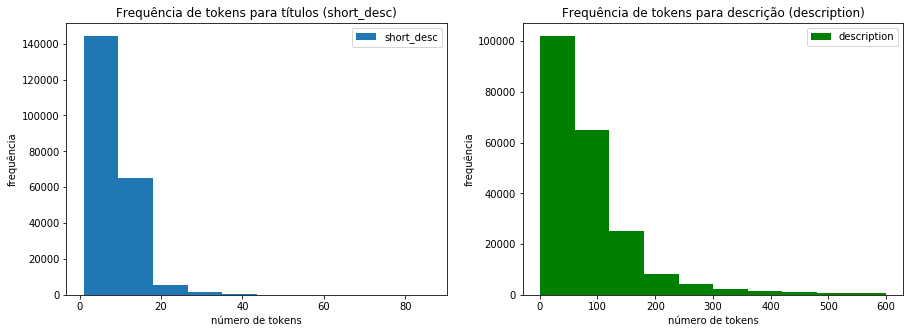

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Title
df_title = pd.DataFrame(title_length, columns=['short_desc'])
print(df_title.describe())
ax = df_title.plot.hist(ax=axes[0])
ax.set_title('Frequência de tokens para títulos (short_desc)')
ax.set_ylabel('frequência')
ax.set_xlabel('número de tokens')
# Description
df_desc = pd.DataFrame(description_length, columns=['description'])
print(df_desc.describe())
df_desc = df_desc[df_desc['description'] <= 600]
ax = df_desc.plot.hist(color='g', ax=axes[1])
ax.set_title('Frequência de tokens para descrição (description)')
ax.set_ylabel('frequência')
ax.set_xlabel('número de tokens')

### Word cloud title

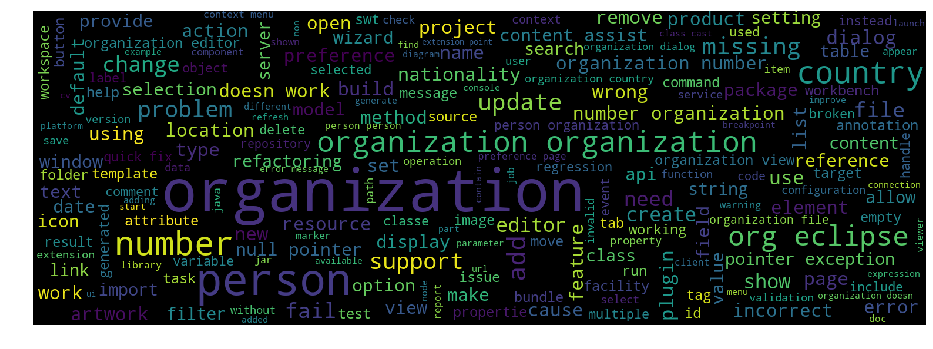

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(title_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word cloud description

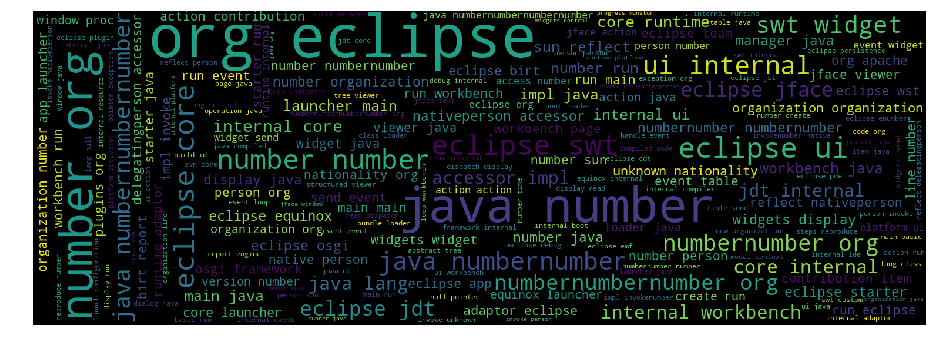

In [15]:
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(description_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()